In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
# Cargar el dataset procesado
data = pd.read_csv('data_evaluacion_processed.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int64
 2   fnlwgt          48842 non-null  int64
 3   education       48842 non-null  int64
 4   education-num   48842 non-null  int64
 5   marital-status  48842 non-null  int64
 6   occupation      48842 non-null  int64
 7   relationship    48842 non-null  int64
 8   race            48842 non-null  int64
 9   sex             48842 non-null  int64
 10  capital-gain    48842 non-null  int64
 11  capital-loss    48842 non-null  int64
 12  hours-per-week  48842 non-null  int64
 13  country         48842 non-null  int64
 14  salary          48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [6]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.099668,1.896641e+05,10.288420,10.078089,2.618750,6.152819,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.433664,0.239282
std,13.710510,1.110810,1.056040e+05,3.874492,2.570973,1.507703,3.968837,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,6.031536,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.376420e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [12]:
# Separar características y etiqueta
x = data.drop('salary', axis=1)
x


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,38
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,38
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,38
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38


In [13]:
y = data['salary']
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: salary, Length: 48842, dtype: int64

In [45]:
# Dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
# Crear el escalador y ajustarlo solo con el conjunto de entrenamiento
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
# Convertir las etiquetas a una codificación one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [48]:
# Verificar el número de características
print(f'Número de características: {x_train.shape[1]}')

Número de características: 14


In [49]:
# Definir el modelo
modelo = Sequential()

# Primera capa oculta
modelo.add(Dense(12, activation='relu', input_shape=(x_train.shape[1],)))  # Actualiza el input_shape

# Segunda capa oculta
modelo.add(Dense(8, activation='relu'))

# Capa de salida
modelo.add(Dense(y_train.shape[1], activation='sigmoid'))  # Cambia num_classes por y_train.shape[1]

# Configuración del modelo
modelo.compile(
    loss='binary_crossentropy',  # Para clasificación binaria
    optimizer='adam',
    metrics=['accuracy']
)


In [50]:
# Entrenar el modelo
historial = modelo.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
2736/2736 [==============================] - 8s 3ms/step - loss: 0.3789 - accuracy: 0.8233 - val_loss: 0.3359 - val_accuracy: 0.8440
Epoch 2/100
2736/2736 [==============================] - 6s 2ms/step - loss: 0.3295 - accuracy: 0.8434 - val_loss: 0.3289 - val_accuracy: 0.8494
Epoch 3/100
2736/2736 [==============================] - 11s 4ms/step - loss: 0.3239 - accuracy: 0.8457 - val_loss: 0.3274 - val_accuracy: 0.8491
Epoch 4/100
2736/2736 [==============================] - 6s 2ms/step - loss: 0.3213 - accuracy: 0.8479 - val_loss: 0.3221 - val_accuracy: 0.8519
Epoch 5/100
2736/2736 [==============================] - 7s 3ms/step - loss: 0.3201 - accuracy: 0.8473 - val_loss: 0.3207 - val_accuracy: 0.8519
Epoch 6/100
2736/2736 [==============================] - 6s 2ms/step - loss: 0.3190 - accuracy: 0.8492 - val_loss: 0.3203 - val_accuracy: 0.8521
Epoch 7/100
2736/2736 [==============================] - 8s 3ms/step - loss: 0.3177 - accuracy: 0.8502 - val_loss: 0.3199 - val_a

In [51]:
modelo.evaluate(x_test,y_test)

458/458 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.8486


[0.3269415497779846, 0.8486316800117493]

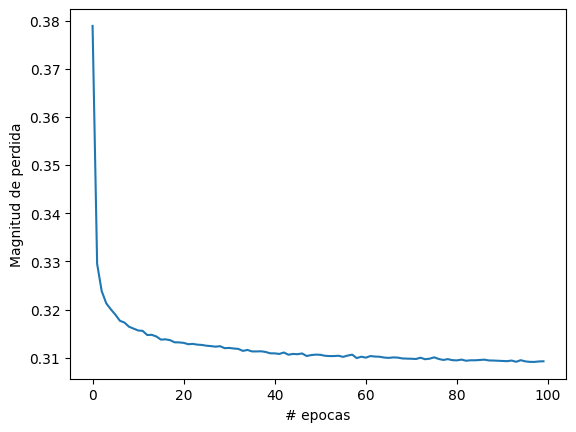

In [52]:
plt.xlabel("# epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [53]:
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes_df = pd.DataFrame(y_pred_classes, columns=['Estimacion'])

458/458 [==============================] - 1s 1ms/step


In [54]:
estimar = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_test), y_pred_classes_df], axis=1)
estimar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,0,1,Estimacion
0,-1.498781,-0.091181,2.193334,0.187589,-0.420951,0.913996,0.206068,-0.278460,0.391807,0.704022,-0.146285,-0.216669,-1.646468,0.256673,1.0,0.0,0
1,-1.571544,-0.091181,-0.107941,-2.129788,-0.810880,0.913996,1.212856,0.967894,0.391807,-1.420410,-0.146285,-0.216669,-1.646468,0.256673,1.0,0.0,0
2,-0.989435,-1.899926,1.495251,0.187589,-0.420951,0.913996,-0.297326,0.344717,-1.979496,0.704022,-0.146285,-0.216669,-0.028759,0.256673,1.0,0.0,0
3,-1.353253,-0.091181,0.262249,1.217534,-0.031022,0.913996,1.212856,0.967894,0.391807,-1.420410,-0.146285,-0.216669,-0.837614,0.256673,1.0,0.0,0
4,0.611367,-0.091181,0.505604,0.187589,-0.420951,0.913996,-0.045629,1.591071,-4.350798,0.704022,-0.146285,-0.216669,1.265408,-0.754764,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14648,1.047950,1.717565,-0.302823,0.187589,-0.420951,-0.416015,1.212856,-0.901637,0.391807,0.704022,-0.146285,-0.216669,2.397805,0.256673,1.0,0.0,0
14649,-0.116270,1.717565,0.902751,0.187589,-0.420951,0.248990,0.206068,1.591071,-1.979496,-1.420410,-0.146285,-0.216669,-0.028759,0.256673,1.0,0.0,0
14650,1.630059,-0.091181,0.349493,0.187589,-0.420951,-1.746026,-1.555811,1.591071,-1.979496,-1.420410,-0.146285,-0.216669,-0.028759,0.256673,1.0,0.0,0
14651,-0.625616,-0.091181,-0.247137,0.187589,-0.420951,0.913996,-1.555811,-0.278460,0.391807,0.704022,-0.146285,-0.216669,-0.190530,0.256673,1.0,0.0,0


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
# Convertir las etiquetas verdaderas y las predicciones a clases
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
print('Confusion Matrix:')
print(cm)

# Informe de clasificación
report = classification_report(y_test_classes, y_pred_classes)
print('Classification Report:')
print(report)


Accuracy: 0.8486316795195523
Confusion Matrix:
[[10154   955]
 [ 1263  2281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     11109
           1       0.70      0.64      0.67      3544

    accuracy                           0.85     14653
   macro avg       0.80      0.78      0.79     14653
weighted avg       0.84      0.85      0.85     14653



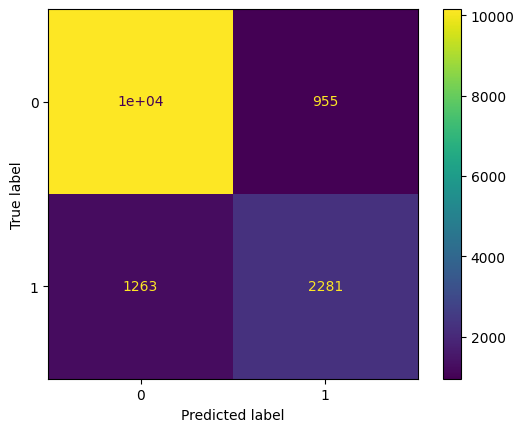

In [57]:
# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_classes))
disp.plot()
plt.show()